En el aprendizaje automático, nuestro objetivo es entrenar un modelo (como una regresión lineal, una red neuronal, etc.). "Entrenar" significa ajustar los _parámetros_ internos del modelo (llamémoslos θ, que puede ser un vector de pesos w y sesgos b) para que haga las mejores predicciones posibles sobre los datos.

Para medir qué tan "buenas" o "malas" son las predicciones del modelo con un conjunto de parámetros θ específico, usamos una **Función de Coste** (o Función de Pérdida, Loss Function), denotada comúnmente como J(θ).

- **Ejemplos de J(θ):**
    - **Error Cuadrático Medio (MSE):** Común en regresión. Mide el promedio de los cuadrados de las diferencias entre las predicciones y los valores reales.
    - **Entropía Cruzada (Cross-Entropy):** Común en clasificación. Mide qué tan diferentes son las distribuciones de probabilidad predichas de las distribuciones reales (etiquetas).

El objetivo del entrenamiento es encontrar el conjunto de parámetros θ que **minimiza** el valor de esta función de coste J(θ). Un coste bajo significa que el modelo se ajusta bien a los datos de entrenamiento.

**3. La Herramienta Clave: El Gradiente (∇J(θ))**

Aquí es donde entra la matemática del cálculo. La "pendiente" en nuestro espacio de parámetros multidimensional se llama **gradiente**.

- El **gradiente** de la función de coste J(θ), denotado como ∇J(θ), es un vector que contiene todas las derivadas parciales de J con respecto a cada parámetro θi​ en el vector θ=(θ0​,θ1​,...,θn​). ∇J(θ)=[∂θ0​∂J​,∂θ1​∂J​,…,∂θn​∂J​]
- **Propiedad Fundamental:** El gradiente ∇J(θ) en un punto θ específico **apunta en la dirección de máximo incremento** de la función J en ese punto. La magnitud del vector gradiente indica cuán empinada es esa pendiente.
- **Nuestra Estrategia:** Si el gradiente apunta hacia donde la función _más sube_, entonces la dirección opuesta, **−∇J(θ)**, apunta hacia donde la función _más baja_ localmente. ¡Esa es la dirección en la que queremos movernos!

**4. El Algoritmo Paso a Paso**

El Descenso de Gradiente es un algoritmo _iterativo_. Repite un proceso de actualización hasta que se alcanza una condición de parada:

1. **Inicialización:** Escoge un punto de partida inicial para los parámetros θ. Puede ser aleatorio, ceros, o alguna otra heurística.
    
2. **Cálculo del Gradiente:** Calcula el gradiente ∇J(θ) de la función de coste en el punto actual θ. Esto te dice la dirección de ascenso más pronunciado.
    
3. Actualización de Parámetros: Mueve los parámetros θ en la dirección opuesta al gradiente. La magnitud del "paso" se controla mediante un parámetro llamado Tasa de Aprendizaje (Learning Rate), denotado por α (a veces η).
    
    La regla de actualización es:
    
    θnuevo​=θactual​−α∇J(θactual​)
    
    - θactual​: Los valores de los parámetros antes de la actualización.
    - θnuevo​: Los valores de los parámetros después de dar un paso.
    - α: La tasa de aprendizaje (un número pequeño y positivo, ej: 0.01, 0.001). Controla qué tan grande es el paso que damos cuesta abajo.
    - ∇J(θactual​): El gradiente calculado con los parámetros actuales.
4. **Repetición:** Vuelve al paso 2 con los nuevos parámetros θnuevo​ y repite el proceso.
    

**5. Condiciones de Parada**

¿Cuándo dejamos de iterar? Hay varias condiciones comunes:

- **Número Máximo de Iteraciones:** Se predefine un número máximo de pasos (épocas) y se detiene cuando se alcanza.
- **Convergencia del Coste:** Se detiene cuando la disminución en la función de coste J(θ) entre iteraciones consecutivas es menor que un umbral pequeño (epsilon, ϵ).
- **Convergencia del Gradiente:** Se detiene cuando la magnitud (norma) del vector gradiente ∣∣∇J(θ)∣∣ es muy cercana a cero. Esto indica que hemos llegado a una zona "plana", que idealmente es un mínimo.
- **Convergencia de los Parámetros:** Se detiene cuando el cambio en los parámetros θ entre iteraciones es muy pequeño.

**6. Variantes del Descenso de Gradiente**

La forma en que se calcula el gradiente en el paso 2 da lugar a diferentes variantes, cruciales para manejar grandes conjuntos de datos:

- **a) Descenso de Gradiente por Lotes (Batch Gradient Descent - BGD):**
    
    - **Cómo funciona:** Calcula el gradiente ∇J(θ) utilizando **todo el conjunto de datos de entrenamiento** en cada iteración (cada paso de actualización).
    - **Pros:**
        - La trayectoria hacia el mínimo es suave y directa (menos ruidosa).
        - Garantiza la convergencia al mínimo global para funciones de coste convexas (como MSE en regresión lineal) y a un mínimo local para funciones no convexas.
        - El cálculo del gradiente es exacto para el lote completo.
    - **Contras:**
        - **Extremadamente lento** y computacionalmente costoso para datasets grandes, ya que requiere procesar todos los datos para _una sola actualización_ de parámetros.
        - Puede requerir cargar todo el dataset en memoria, lo cual puede ser inviable.
        - No es adecuado para aprendizaje online (cuando los datos llegan secuencialmente).
- **b) Descenso de Gradiente Estocástico (Stochastic Gradient Descent - SGD):**
    
    - **Cómo funciona:** Calcula el gradiente ∇J(θ) utilizando **un solo ejemplo de entrenamiento** seleccionado aleatoriamente en cada iteración.
    - **Pros:**
        - **Mucho más rápido** por iteración que BGD.
        - Adecuado para datasets muy grandes y aprendizaje online.
        - La naturaleza "ruidosa" de las actualizaciones (debido a la estimación del gradiente basada en un solo punto) puede ayudar a **escapar de mínimos locales poco profundos**.
        - Requiere menos memoria.
    - **Contras:**
        - La trayectoria hacia el mínimo es muy ruidosa y oscilante. No converge directamente, sino que tiende a fluctuar alrededor del mínimo.
        - La alta varianza en las actualizaciones puede hacer que la convergencia sea inestable.
        - Requiere un ajuste cuidadoso de la tasa de aprendizaje α, a menudo disminuyéndola con el tiempo (learning rate scheduling).
        - Pierde los beneficios de la computación vectorizada eficiente.
- **c) Descenso de Gradiente por Mini-Lotes (Mini-Batch Gradient Descent - MBGD):**
    
    - **Cómo funciona:** Calcula el gradiente ∇J(θ) utilizando un **pequeño subconjunto aleatorio (mini-lote)** del conjunto de datos de entrenamiento en cada iteración (ej: 32, 64, 128, 256 ejemplos).
    - **Pros:**
        - Combina las ventajas de BGD y SGD.
        - **Mucho más rápido** que BGD.
        - Convergencia más estable y menos ruidosa que SGD.
        - Permite aprovechar la **vectorización** para cálculos eficientes, especialmente en GPUs/TPUs, lo que lo hace muy rápido en la práctica.
        - Es el método **más utilizado en la práctica**, especialmente en Deep Learning.
    - **Contras:**
        - Introduce un nuevo hiperparámetro: el tamaño del mini-lote (batch size).
        - La convergencia sigue siendo algo ruidosa (aunque mucho menos que SGD).

**7. Desafíos y Consideraciones Importantes**

- **Elección de la Tasa de Aprendizaje (α):**
    
    - **Demasiado pequeña:** La convergencia será muy lenta.
    - **Demasiado grande:** El algoritmo puede "saltar" por encima del mínimo (overshooting) o incluso divergir (el coste aumenta en lugar de disminuir).
    - Es un hiperparámetro crucial que a menudo requiere ajuste (tuning). Técnicas como la _programación de la tasa de aprendizaje_ (disminuir α con el tiempo) o _tasas de aprendizaje adaptativas_ (como AdaGrad, RMSprop, Adam, que ajustan α por parámetro) son comunes.
- **Mínimos Locales y Puntos de Silla:**
    
    - En funciones de coste no convexas (típicas en redes neuronales profundas), el descenso de gradiente puede quedarse "atrapado" en un **mínimo local** (un valle que no es el más profundo) o en un **punto de silla** (un punto plano que es mínimo en una dirección pero máximo en otra).
    - SGD y MBGD, debido a su ruido, tienen una mayor probabilidad de escapar de estos puntos que BGD. En espacios de alta dimensión (como en deep learning), los puntos de silla suelen ser un problema más común que los mínimos locales.
- **Escalado de Características (Feature Scaling):**
    
    - Si las características (variables de entrada) del modelo tienen rangos muy diferentes (ej: edad 20-60 vs. salario 30000-150000), la función de coste tendrá contornos alargados (como un óvalo muy estirado). Esto hace que el descenso de gradiente oscile mucho y converja lentamente.
    - Es fundamental **escalar las características** (ej: estandarización o normalización) para que tengan rangos similares (ej: media 0 y desviación estándar 1). Esto hace que los contornos de la función de coste sean más circulares, permitiendo al gradiente apuntar más directamente hacia el mínimo y acelerando la convergencia.
- **Convergencia:** Es importante monitorizar la función de coste J(θ) durante el entrenamiento. Debería disminuir en general (aunque con fluctuaciones en SGD/MBGD). Si aumenta o se estanca prematuramente, puede indicar problemas con la tasa de aprendizaje, la inicialización o el propio modelo.
    

**8. Aplicaciones**

El Descenso de Gradiente y sus variantes son la piedra angular para entrenar una vasta gama de modelos de aprendizaje automático:

- Regresión Lineal y Polinomial
- Regresión Logística
- Máquinas de Vectores de Soporte (SVM)
- **Redes Neuronales (Backpropagation):** El algoritmo de retropropagación (backpropagation) calcula eficientemente el gradiente de la función de coste con respecto a los pesos de la red, y luego se usa una variante de GD (casi siempre MBGD con optimizadores como Adam) para actualizar esos pesos.
- Factorización de Matrices (Sistemas de Recomendación)
- Muchos otros problemas de optimización en ciencia e ingeniería.

In [1]:
# first implementation
import numpy as np
import matplotlib.pyplot as plt

# Generamos datos sintéticos
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) * 0.5

# Añadimos columna de unos para el término independiente
X_b = np.c_[np.ones((100, 1)), X]

# Implementación del Descenso de Gradiente por Lotes
def gradiente_descendente(X, y, theta, alpha, n_iteraciones):
    m = len(y)
    costo_historia = []
    
    for i in range(n_iteraciones):
        # Cálculo del gradiente
        prediccion = X.dot(theta)
        error = prediccion - y
        gradiente = 2/m * X.T.dot(error)
        
        # Actualización de parámetros
        theta = theta - alpha * gradiente
        
        # Cálculo del costo
        costo = np.mean(error ** 2)
        costo_historia.append(costo)
    
    return theta, costo_historia

# Inicializamos parámetros
theta_inicial = np.random.randn(2, 1)
alpha = 0.01
n_iteraciones = 1000

# Entrenamos el modelo
theta_final, historia_costo = gradiente_descendente(X_b, y, theta_inicial, alpha, n_iteraciones)


In [2]:
print(f"Parámetros encontrados: θ₀ = {theta_final[0][0]:.2f}, θ₁ = {theta_final[1][0]:.2f}")
print(f"Parámetros reales: θ₀ = 4.00, θ₁ = 3.00")

Parámetros encontrados: θ₀ = 4.05, θ₁ = 2.93
Parámetros reales: θ₀ = 4.00, θ₁ = 3.00


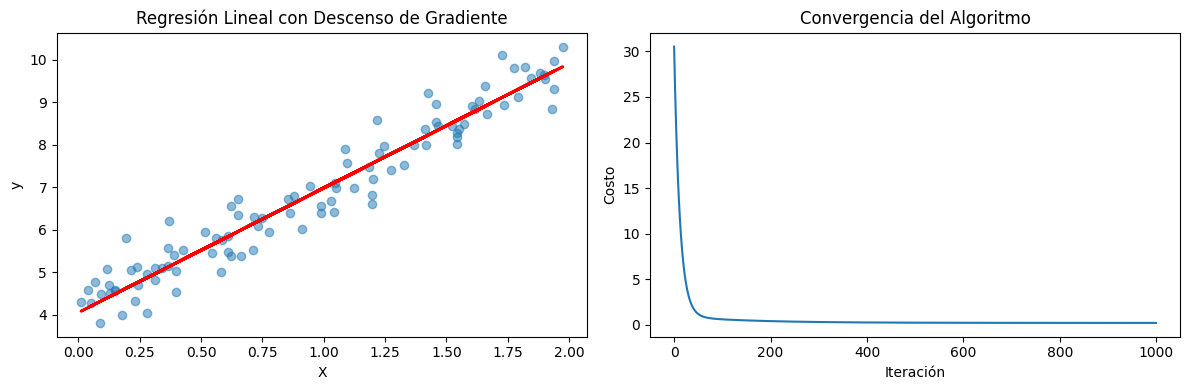

In [3]:

# Visualización de resultados
plt.figure(figsize=(12, 4))

# Gráfico de datos y línea de regresión
plt.subplot(121)
plt.scatter(X, y, alpha=0.5)
plt.plot(X, X_b.dot(theta_final), color='red', linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresión Lineal con Descenso de Gradiente')

# Gráfico de convergencia
plt.subplot(122)
plt.plot(historia_costo)
plt.xlabel('Iteración')
plt.ylabel('Costo')
plt.title('Convergencia del Algoritmo')
plt.tight_layout()
plt.show()




# secon implementation